In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [2]:
x_train

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       ...,
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]], dtype=float32)

# 用Model来组建配件

In [3]:
# in order to plot in a 2D figure                                                        
encoding_dim = 2

# this is our input placeholder                                                          
input_img = Input(shape=(784,))

# encoder layers                                                                         
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers                                                                         
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model                                                        
autoencoder = Model(input=input_img, output=decoded)

# construct the encoder model for plotting                                               
encoder = Model(input=input_img, output=encoder_output)


/Users/wangjianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/Users/wangjianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [4]:
# compile autoencoder                                                                    
autoencoder.compile(optimizer='adam', loss='mse')

# training                                                                               
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0693
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0565
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0521
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0484
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0466
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0452
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0441
Epoch 8/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0432
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0425
Epoch 10/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0419
Epoch 11/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0416
Epoch 12/20
60000/60000 [===========================

In [5]:
# plotting                                                                               
encoded_imgs = encoder.predict(x_test)
encoded_imgs.shape


(10000, 2)

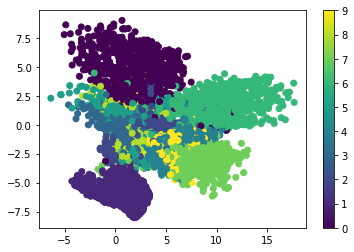

In [6]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()